# price

In [60]:
!pip install squarify
import squarify 

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
C:\Program Files\Python310\lib\threading.py:950: ResourceWarning: unclosed file <_io.BufferedWriter name=5>
  del self._target, self._args, self._kwargs
C:\Program Files\Python310\lib\threading.py:950: ResourceWarning: unclosed file <_io.BufferedReader name=6>
  del self._target, self._args, self._kwargs
C:\Program Files\Python310\lib\threading.py:950: ResourceWarning: unclosed file <_io.BufferedReader name=7>
  del self._target, self._args, self._kwargs
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x1e8efb064a0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x1e8ef93fa60>


In [61]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')
import random
import math
import squarify 

In [62]:
dataframe = pd.read_csv("final.csv")
dataframe.head()

,index,House Direction,Balcony Direction,Bedrooms,Toilets,Legits,Floors,Facade,Entrance,District,Ward,Street,Area,Price,X,Y
0,5,None,None,6,6,+đỏ,6,5.1,30.0,đống đa,ô chợ dừa,xã đàn,80.0,28000.0,21.024039,105.824232
1,6,None,None,6,4,+đỏ,5,4.6,NaN,hà đông,quang trung,quang trung,78.0,6100.0,20.969225,105.774632
2,7,None,None,4,3,+đỏ+hồng,4,5.0,NaN,hà đông,quang trung,quang trung,48.0,6200.0,20.969225,105.774632
3,8,None,None,4,3,+đỏ,4,4.0,NaN,hà đông,văn quán,None,43.0,3800.0,20.979725,105.790661
4,9,None,None,3,4,+đỏ+hồng,5,4.0,2.5,nam từ liêm,phú đô,lê quang đạo,35.0,4000.0,21.011045,105.767012


In [63]:
#Checking the missing values
dataframe.isnull().sum()

index                    0
House Direction          0
Balcony Direction        0
Bedrooms                 0
Toilets                  0
Legits                   0
Floors                   0
Facade                   0
Entrance             27465
District                 0
Ward                     1
Street                   0
Area                     3
Price                    0
X                        0
Y                        0
dtype: int64

In [64]:
#Fill nan
dataframe['Entrance'].fillna(dataframe['Entrance'].mode()[0], inplace=True)
dataframe['Area'].fillna(dataframe['Area'].mean(), inplace=True)
dataframe['Ward'] = dataframe['Ward'].fillna('None')
dataframe['Street'] = dataframe['Street'].fillna('None')
dataframe.isnull().sum()

index                0
House Direction      0
Balcony Direction    0
Bedrooms             0
Toilets              0
Legits               0
Floors               0
Facade               0
Entrance             0
District             0
Ward                 0
Street               0
Area                 0
Price                0
X                    0
Y                    0
dtype: int64

In [65]:
dataframe

,index,House Direction,Balcony Direction,Bedrooms,Toilets,Legits,Floors,Facade,Entrance,District,Ward,Street,Area,Price,X,Y
0,5,None,None,6,6,+đỏ,6,5.1,30.0,đống đa,ô chợ dừa,xã đàn,80.0,28000.0,21.024039,105.824232
1,6,None,None,6,4,+đỏ,5,4.6,3.0,hà đông,quang trung,quang trung,78.0,6100.0,20.969225,105.774632
2,7,None,None,4,3,+đỏ+hồng,4,5.0,3.0,hà đông,quang trung,quang trung,48.0,6200.0,20.969225,105.774632
3,8,None,None,4,3,+đỏ,4,4.0,3.0,hà đông,văn quán,None,43.0,3800.0,20.979725,105.790661
4,9,None,None,3,4,+đỏ+hồng,5,4.0,2.5,nam từ liêm,phú đô,lê quang đạo,35.0,4000.0,21.011045,105.767012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34951,21221,None,None,4,None,+đỏ+hồng,4,3.0,3.0,thanh xuân,thượng đình,nguyễn trãi,54.0,48000.0,20.997660,105.812218
34952,21222,None,None,4,None,+đỏ+hồng,5,3.0,3.0,thanh xuân,khương trung,khương trung,75.0,65000.0,20.999841,105.818591
34953,21223,None,None,4,None,+đỏ+hồng,4,3.0,3.0,đống đa,láng hạ,láng,40.0,43000.0,21.014730,105.811772
34954,21224,None,None,4,None,None,5,3.0,3.0,đống đa,cát linh,hào nam,42.0,76000.0,21.029292,105.830226


In [66]:
dataframe.Price.describe()

count    3.495600e+04
mean     1.486163e+05
std      1.442960e+06
min      0.000000e+00
25%      9.900000e+03
50%      4.200000e+04
75%      1.100000e+05
max      2.300000e+08
Name: Price, dtype: float64

<AxesSubplot:xlabel='Price'>

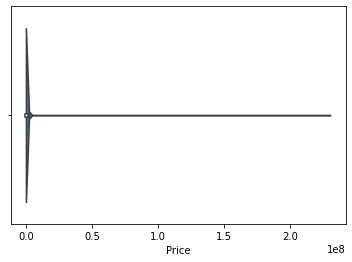

In [67]:
sns.violinplot(x = dataframe['Price'])

In [68]:
#dataframe = dataframe[dataframe["Price"] > dataframe.Price.quantile(0.25)]
#dataframe = dataframe[dataframe["Price"] < dataframe.Price.quantile(0.75)]
Q1 = dataframe.quantile(0.25)
Q3 = dataframe.quantile(0.75)
IQR = Q3 - Q1
dataframe = dataframe[~((dataframe < (Q1 - 1.5 * IQR)) |(dataframe > (Q3 + 1.5 * IQR))).any(axis=1)]
dataframe.Price.describe()

C:\Users\Hp\AppData\Local\Temp\ipykernel_21200\2843514425.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  dataframe = dataframe[~((dataframe < (Q1 - 1.5 * IQR)) |(dataframe > (Q3 + 1.5 * IQR))).any(axis=1)]


count     21701.000000
mean      58644.950184
std       55875.684936
min           0.000000
25%       12000.000000
50%       43500.000000
75%       82000.000000
max      260000.000000
Name: Price, dtype: float64

<AxesSubplot:xlabel='Price'>

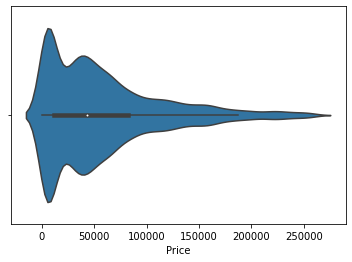

In [69]:
sns.violinplot(x = dataframe['Price'])

In [70]:
dataframe

,index,House Direction,Balcony Direction,Bedrooms,Toilets,Legits,Floors,Facade,Entrance,District,Ward,Street,Area,Price,X,Y
1,6,None,None,6,4,+đỏ,5,4.6,3.0,hà đông,quang trung,quang trung,78.0,6100.0,20.969225,105.774632
2,7,None,None,4,3,+đỏ+hồng,4,5.0,3.0,hà đông,quang trung,quang trung,48.0,6200.0,20.969225,105.774632
3,8,None,None,4,3,+đỏ,4,4.0,3.0,hà đông,văn quán,None,43.0,3800.0,20.979725,105.790661
5,10,None,None,4,3,+đỏ+hồng,4,4.5,3.0,thanh xuân,nhân chính,quan nhân,51.0,5150.0,21.002808,105.811433
8,13,None,None,None,None,+đỏ+hồng,None,4.8,3.0,hà đông,vạn phúc,vạn phúc,35.0,3880.0,20.979700,105.770957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34951,21221,None,None,4,None,+đỏ+hồng,4,3.0,3.0,thanh xuân,thượng đình,nguyễn trãi,54.0,48000.0,20.997660,105.812218
34952,21222,None,None,4,None,+đỏ+hồng,5,3.0,3.0,thanh xuân,khương trung,khương trung,75.0,65000.0,20.999841,105.818591
34953,21223,None,None,4,None,+đỏ+hồng,4,3.0,3.0,đống đa,láng hạ,láng,40.0,43000.0,21.014730,105.811772
34954,21224,None,None,4,None,None,5,3.0,3.0,đống đa,cát linh,hào nam,42.0,76000.0,21.029292,105.830226


<AxesSubplot:xlabel='Area'>

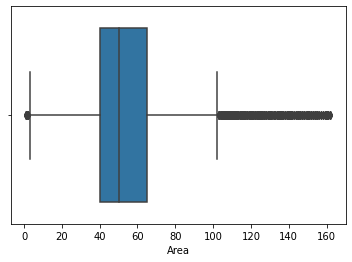

In [71]:
sns.boxplot(x = dataframe['Area'])

In [72]:
# Unvariate analysis
dataframe = dataframe.rename(columns={'House Direction': 'HouseDirection', 'Balcony Direction': 'BalconyDirection'})
dataframe

,index,HouseDirection,BalconyDirection,Bedrooms,Toilets,Legits,Floors,Facade,Entrance,District,Ward,Street,Area,Price,X,Y
1,6,None,None,6,4,+đỏ,5,4.6,3.0,hà đông,quang trung,quang trung,78.0,6100.0,20.969225,105.774632
2,7,None,None,4,3,+đỏ+hồng,4,5.0,3.0,hà đông,quang trung,quang trung,48.0,6200.0,20.969225,105.774632
3,8,None,None,4,3,+đỏ,4,4.0,3.0,hà đông,văn quán,None,43.0,3800.0,20.979725,105.790661
5,10,None,None,4,3,+đỏ+hồng,4,4.5,3.0,thanh xuân,nhân chính,quan nhân,51.0,5150.0,21.002808,105.811433
8,13,None,None,None,None,+đỏ+hồng,None,4.8,3.0,hà đông,vạn phúc,vạn phúc,35.0,3880.0,20.979700,105.770957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34951,21221,None,None,4,None,+đỏ+hồng,4,3.0,3.0,thanh xuân,thượng đình,nguyễn trãi,54.0,48000.0,20.997660,105.812218
34952,21222,None,None,4,None,+đỏ+hồng,5,3.0,3.0,thanh xuân,khương trung,khương trung,75.0,65000.0,20.999841,105.818591
34953,21223,None,None,4,None,+đỏ+hồng,4,3.0,3.0,đống đa,láng hạ,láng,40.0,43000.0,21.014730,105.811772
34954,21224,None,None,4,None,None,5,3.0,3.0,đống đa,cát linh,hào nam,42.0,76000.0,21.029292,105.830226


<function matplotlib.pyplot.show(close=None, block=None)>

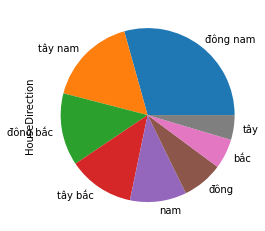

In [73]:
dataframe[dataframe['HouseDirection']!='None'].HouseDirection.value_counts(normalize=True).plot.pie()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

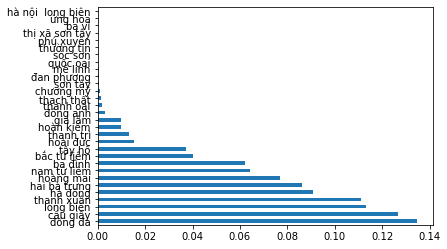

In [74]:
dataframe[dataframe['District']!='None'].District.value_counts(normalize=True).plot.barh()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

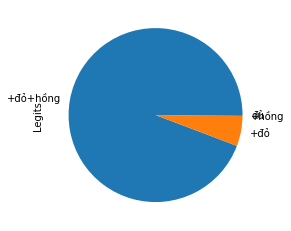

In [75]:
dataframe[dataframe['Legits']!='None'].Legits.value_counts(normalize=True).plot.pie()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

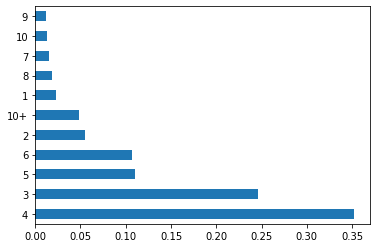

In [76]:
dataframe[dataframe['Bedrooms']!='None'].Bedrooms.value_counts(normalize=True).plot.barh()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

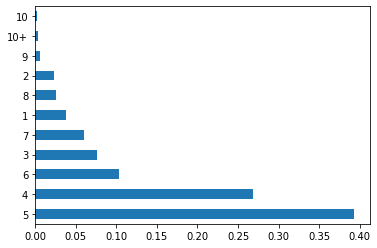

In [77]:
dataframe[dataframe['Floors']!='None'].Floors.value_counts(normalize=True).plot.barh()
plt.show

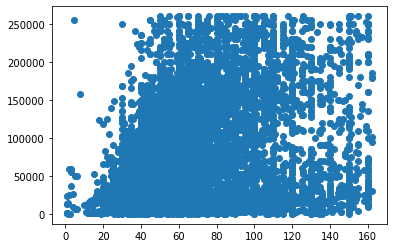

In [78]:
#Plot the scatter plot of price and area of the house
plt.scatter(dataframe.Area, dataframe.Price)

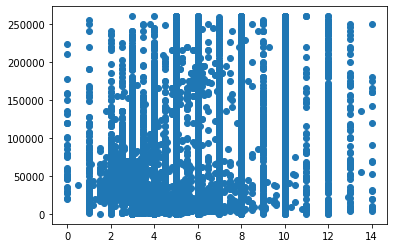

In [79]:
#Plot the scatter plot of price and fascade of the house
plt.scatter(dataframe.Facade, dataframe.Price)

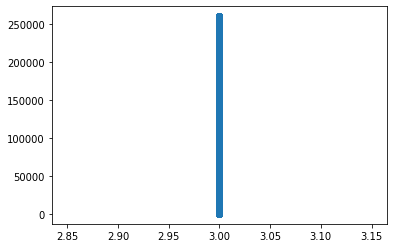

In [80]:
#Plot the scatter plot of price and entrance of the house
plt.scatter(dataframe.Entrance, dataframe.Price)

In [81]:
dataframe

,index,HouseDirection,BalconyDirection,Bedrooms,Toilets,Legits,Floors,Facade,Entrance,District,Ward,Street,Area,Price,X,Y
1,6,None,None,6,4,+đỏ,5,4.6,3.0,hà đông,quang trung,quang trung,78.0,6100.0,20.969225,105.774632
2,7,None,None,4,3,+đỏ+hồng,4,5.0,3.0,hà đông,quang trung,quang trung,48.0,6200.0,20.969225,105.774632
3,8,None,None,4,3,+đỏ,4,4.0,3.0,hà đông,văn quán,None,43.0,3800.0,20.979725,105.790661
5,10,None,None,4,3,+đỏ+hồng,4,4.5,3.0,thanh xuân,nhân chính,quan nhân,51.0,5150.0,21.002808,105.811433
8,13,None,None,None,None,+đỏ+hồng,None,4.8,3.0,hà đông,vạn phúc,vạn phúc,35.0,3880.0,20.979700,105.770957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34951,21221,None,None,4,None,+đỏ+hồng,4,3.0,3.0,thanh xuân,thượng đình,nguyễn trãi,54.0,48000.0,20.997660,105.812218
34952,21222,None,None,4,None,+đỏ+hồng,5,3.0,3.0,thanh xuân,khương trung,khương trung,75.0,65000.0,20.999841,105.818591
34953,21223,None,None,4,None,+đỏ+hồng,4,3.0,3.0,đống đa,láng hạ,láng,40.0,43000.0,21.014730,105.811772
34954,21224,None,None,4,None,None,5,3.0,3.0,đống đa,cát linh,hào nam,42.0,76000.0,21.029292,105.830226


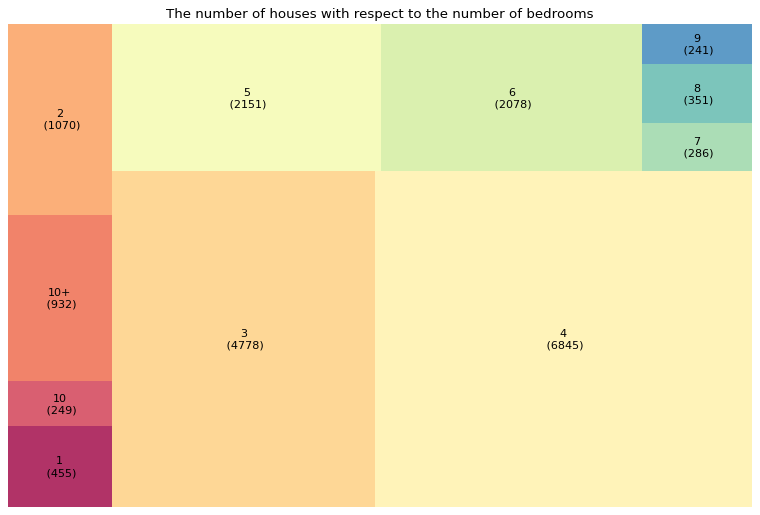

In [82]:
dataframe_for_bedroom1 = dataframe[dataframe['Bedrooms']!='None']
dataframe_for_bedroom1=dataframe_for_bedroom1.groupby('Bedrooms').size().reset_index(name='counts')
labels = dataframe_for_bedroom1.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = dataframe_for_bedroom1['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

plt.title('The number of houses with respect to the number of bedrooms')
plt.axis('off')
plt.show()

C:\Users\Hp\AppData\Local\Temp\ipykernel_21200\4128935568.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dftmp3 = dftmp3[dataframe['Bedrooms']!='10+']
C:\Users\Hp\AppData\Local\Temp\ipykernel_21200\4128935568.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(df_bedroom['Bedrooms'], rotation=60, horizontalalignment= 'right')


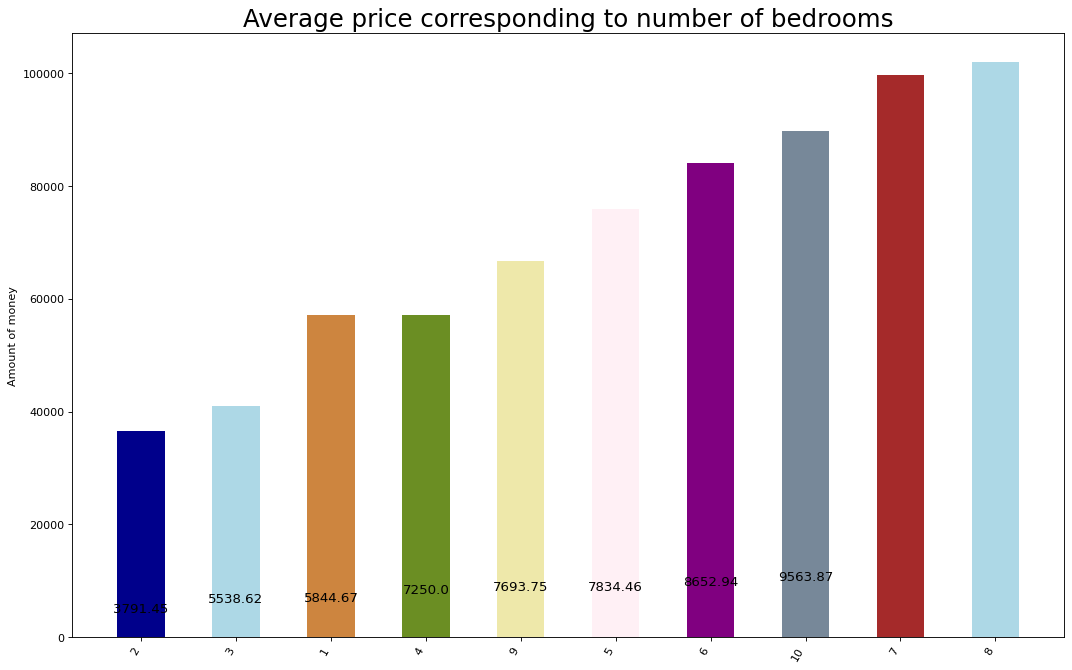

In [83]:
# pic?
dftmp3 = dataframe[dataframe['Bedrooms']!='None']
dftmp3 = dftmp3[dataframe['Bedrooms']!='10+']
df_bedroom = dftmp3.groupby('Bedrooms')['Price'].mean().reset_index(name='Amount of money')
df_bedroom = df_bedroom.sort_values(by = 'Amount of money') 
df_bedroom['Amount of money'] = df_bedroom['Amount of money'].apply(lambda x : round(x, 2))
n = df_bedroom['Bedrooms'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)

plt.figure(figsize=(16,10), dpi= 80)
plt.bar(df_bedroom['Bedrooms'], df_bedroom['Amount of money'], color=c, width=.5)
for i, val in enumerate(df2['Amount of money'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

plt.gca().set_xticklabels(df_bedroom['Bedrooms'], rotation=60, horizontalalignment= 'right')
plt.title("Average price corresponding to number of bedrooms", fontsize=22)
plt.ylabel('Amount of money')
# plt.ylim(25,35)
plt.show()

C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with

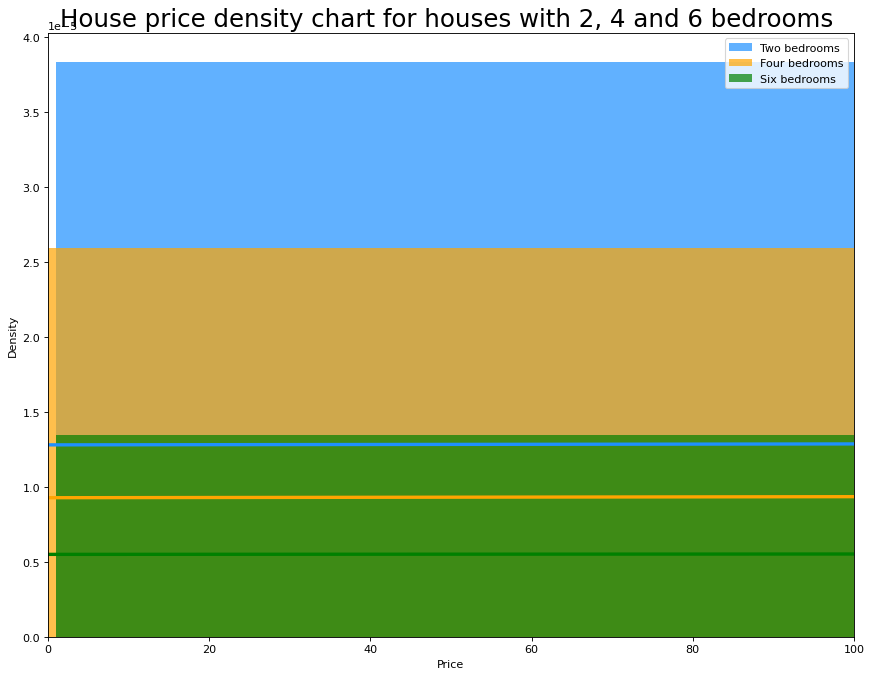

In [84]:
#density is so strange :(()
plt.figure(figsize=(13,10), dpi= 80)
dataframe_for_bedroom_3= dataframe[dataframe['Bedrooms']!='None']
dataframe_for_bedroom_3= dataframe_for_bedroom_3[dataframe_for_bedroom_3['Bedrooms']!='10+']
sns.distplot(dataframe_for_bedroom_3.loc[dataframe_for_bedroom_3['Bedrooms'].astype(int) == 2, "Price"], color="dodgerblue", label="Two bedrooms", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
sns.distplot(dataframe_for_bedroom_3.loc[dataframe_for_bedroom_3['Bedrooms'].astype(int) == 4, "Price"], color="orange", label="Four bedrooms", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
sns.distplot(dataframe_for_bedroom_3.loc[dataframe_for_bedroom_3['Bedrooms'].astype(int) == 6, "Price"], color="g", label="Six bedrooms", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
plt.xlim(0, 100)
plt.title('House price density chart for houses with 2, 4 and 6 bedrooms ', fontsize=22)
plt.legend()
plt.show()

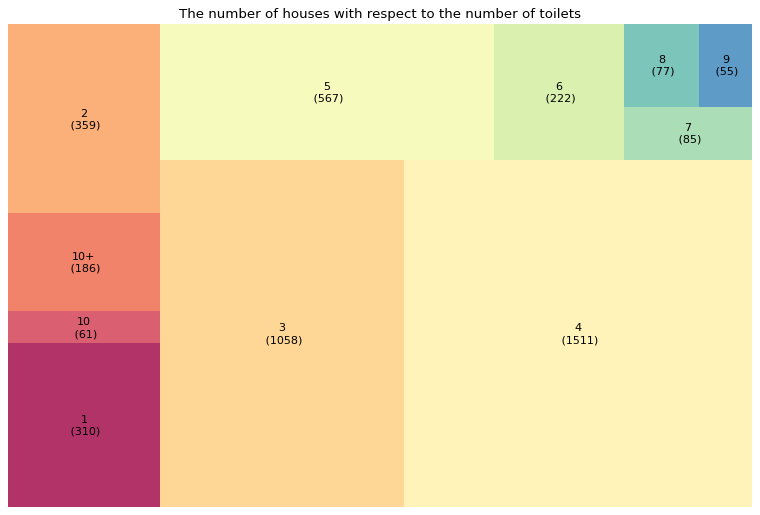

In [85]:
dataframe_for_toilet1 = dataframe[dataframe['Toilets']!='None']
dataframe_for_toilet1=dataframe_for_toilet1.groupby('Toilets').size().reset_index(name='counts')
labels = dataframe_for_toilet1.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = dataframe_for_toilet1['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

plt.title('The number of houses with respect to the number of toilets')
plt.axis('off')
plt.show()

C:\Users\Hp\AppData\Local\Temp\ipykernel_21200\4029169877.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dftmp4 = dftmp4[dataframe['Toilets']!='10+']
C:\Users\Hp\AppData\Local\Temp\ipykernel_21200\4029169877.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(df_toilet['Toilets'], rotation=60, horizontalalignment= 'right')


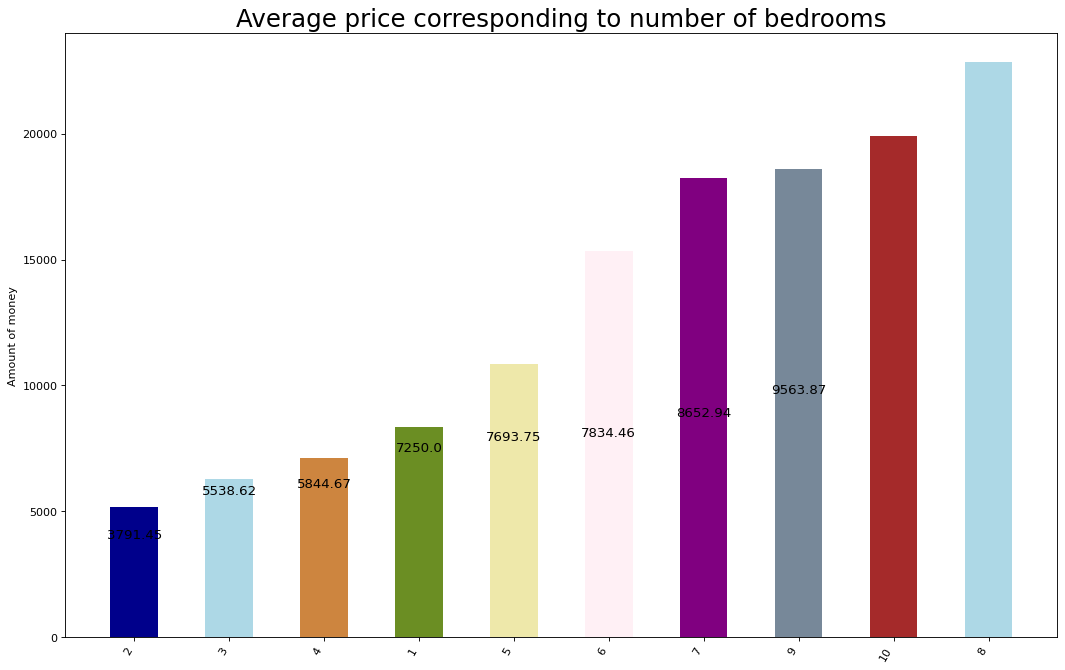

In [86]:
# pic?
dftmp4 = dataframe[dataframe['Toilets']!='None']
dftmp4 = dftmp4[dataframe['Toilets']!='10+']
df_toilet = dftmp4.groupby('Toilets')['Price'].mean().reset_index(name='Amount of money')
df_toilet= df_toilet.sort_values(by = 'Amount of money') 
df_toilet['Amount of money'] = df_toilet['Amount of money'].apply(lambda x : round(x, 2))
n = df_toilet['Toilets'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)

plt.figure(figsize=(16,10), dpi= 80)
plt.bar(df_toilet['Toilets'], df_toilet['Amount of money'], color=c, width=.5)
for i, val in enumerate(df2['Amount of money'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

plt.gca().set_xticklabels(df_toilet['Toilets'], rotation=60, horizontalalignment= 'right')
plt.title("Average price corresponding to number of bedrooms", fontsize=22)
plt.ylabel('Amount of money')
#plt.ylim(25,35)
plt.show()

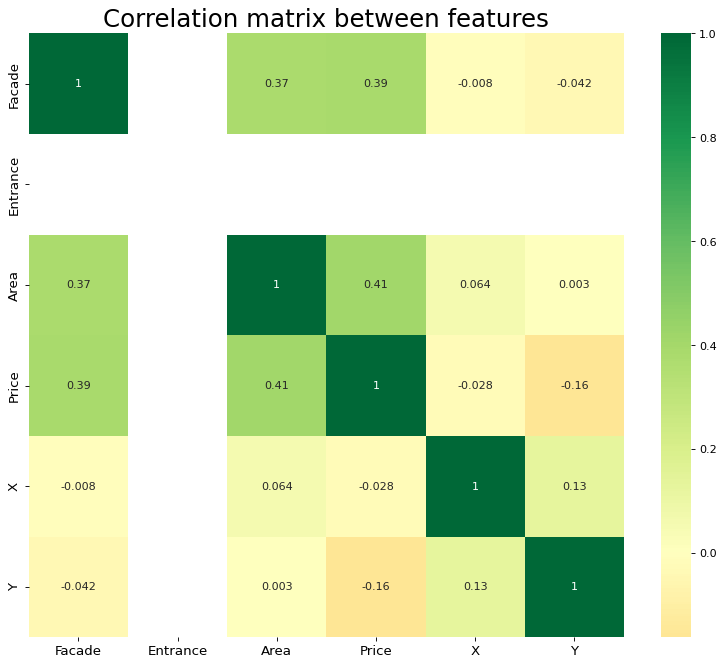

In [87]:
plt.figure(figsize=(12,10), dpi= 80)
dftmp = dataframe.drop(['index'], axis=1)
sns.heatmap(dftmp.copy().corr(), xticklabels=dftmp.corr().columns, yticklabels=dftmp.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.title('Correlation matrix between features', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:130: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < LooseVersion("3.0"):


(0.0, 100.0)

<Figure size 432x288 with 0 Axes>

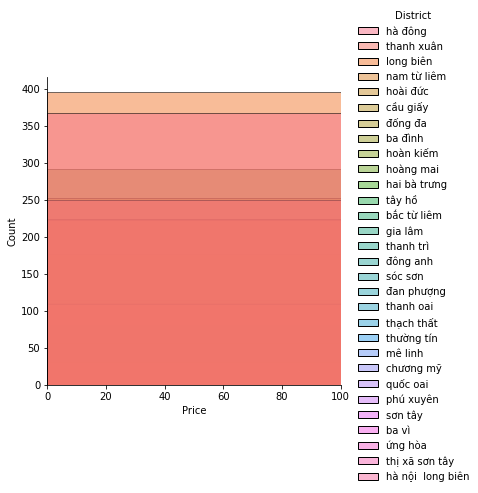

In [88]:
#average house price grouped by districs
df_district = dataframe.copy()
plt.clf()
sns.displot(df_district, x="Price", hue="District")
plt.xlim(0, 100)

C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:130: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < LooseVersion("3.0"):


(0.0, 100.0)

<Figure size 432x288 with 0 Axes>

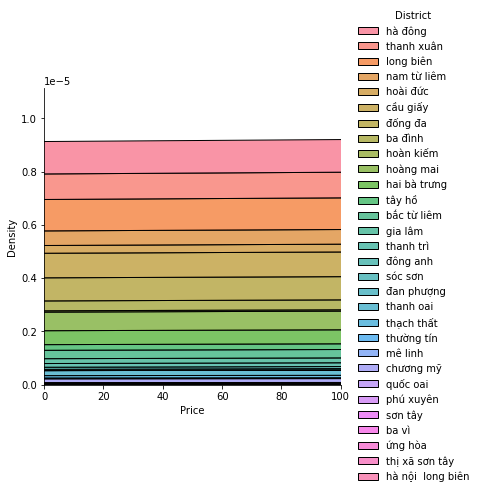

In [89]:
plt.clf()
sns.displot(df_district, x="Price", hue="District", kind="kde", multiple="stack")
plt.xlim(0, 100)

C:\Users\Hp\AppData\Local\Temp\ipykernel_21200\3018764795.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(df2['District'], rotation=60, horizontalalignment= 'right')


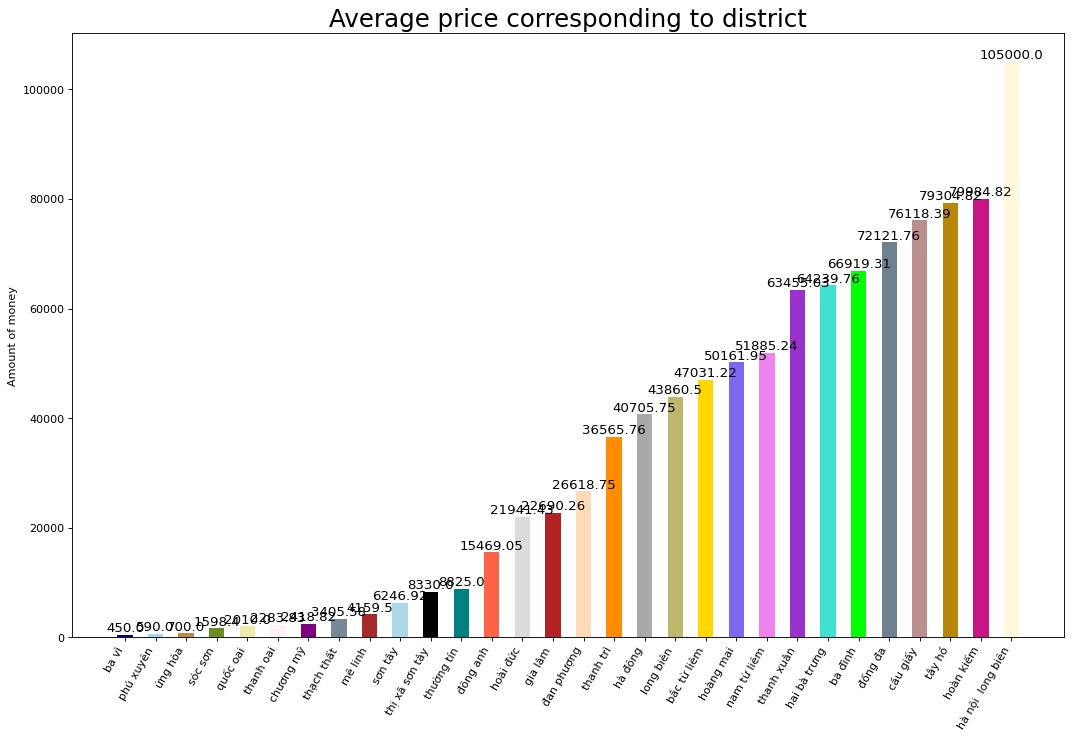

In [90]:
dftmp1 = dataframe[dataframe['District']!='None']
df2 = dftmp1.groupby('District')['Price'].mean().reset_index(name='Amount of money')
df2 = df2.sort_values(by = 'Amount of money') 
df2['Amount of money'] = df2['Amount of money'].apply(lambda x : round(x, 2))
n = df2['District'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)

plt.figure(figsize=(16,10), dpi= 80)
plt.bar(df2['District'], df2['Amount of money'], color=c, width=.5)
for i, val in enumerate(df2['Amount of money'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

plt.gca().set_xticklabels(df2['District'], rotation=60, horizontalalignment= 'right')
plt.title("Average price corresponding to district", fontsize=22)
plt.ylabel('Amount of money')
# plt.ylim(25,35)
plt.show()

<Figure size 800x640 with 0 Axes>

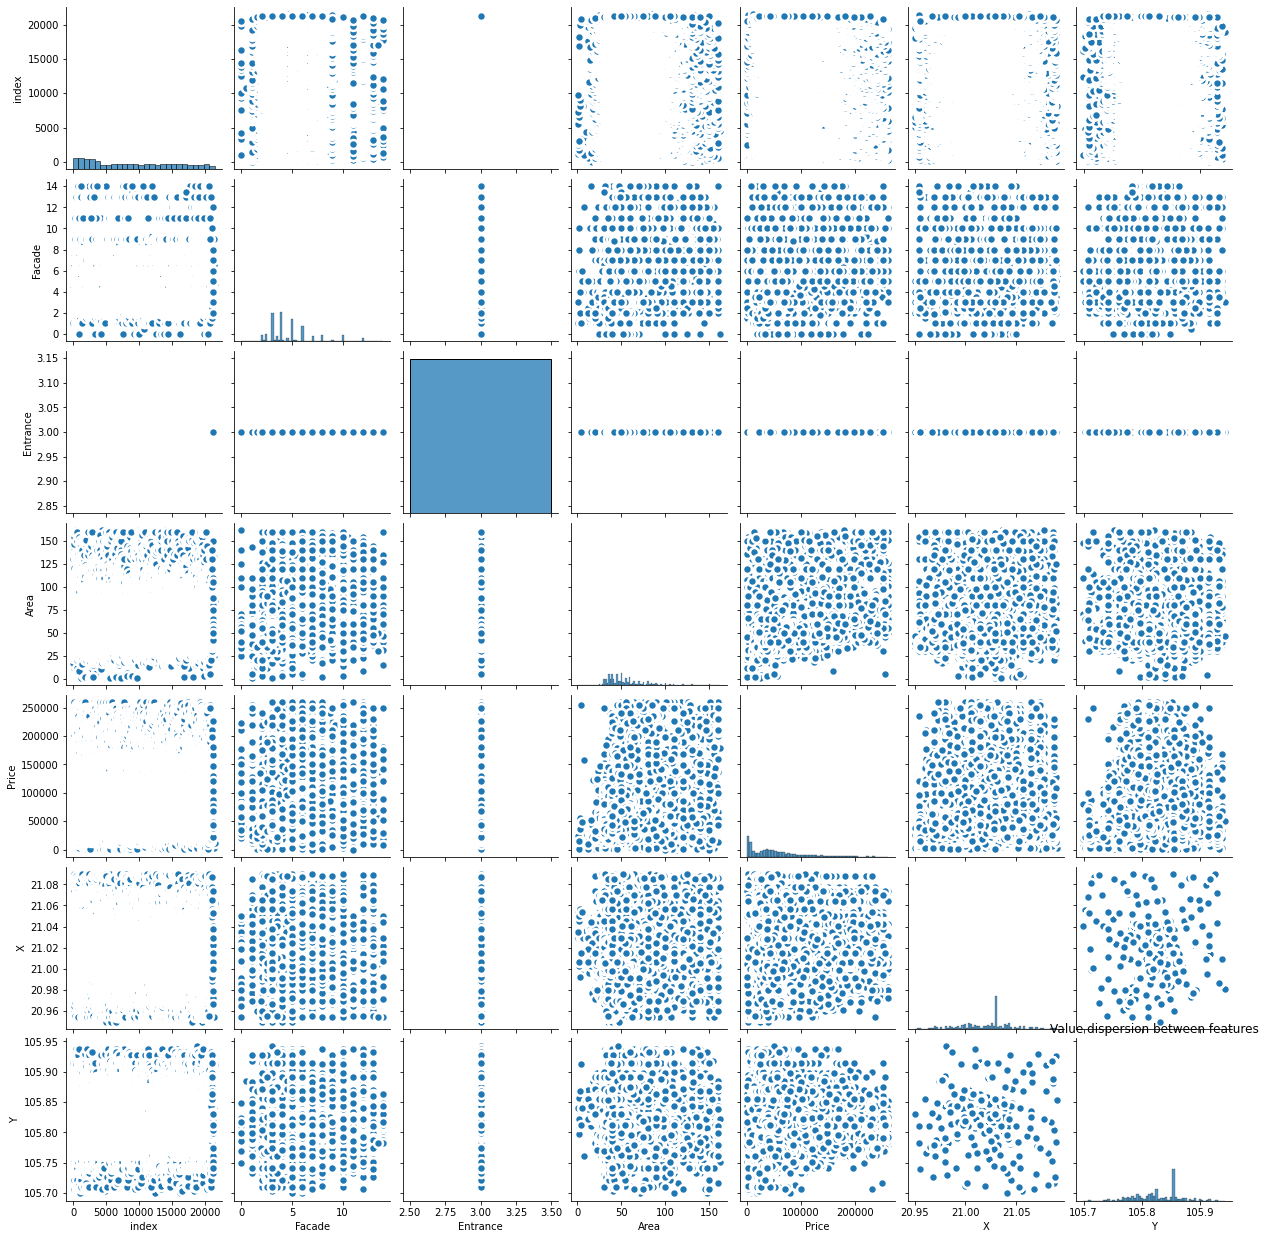

In [91]:
#Chart represeting the relationship between real variables
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(dataframe, kind="scatter", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.title('Value dispersion between features')
plt.show()

In [92]:
dataframe

,index,HouseDirection,BalconyDirection,Bedrooms,Toilets,Legits,Floors,Facade,Entrance,District,Ward,Street,Area,Price,X,Y
1,6,None,None,6,4,+đỏ,5,4.6,3.0,hà đông,quang trung,quang trung,78.0,6100.0,20.969225,105.774632
2,7,None,None,4,3,+đỏ+hồng,4,5.0,3.0,hà đông,quang trung,quang trung,48.0,6200.0,20.969225,105.774632
3,8,None,None,4,3,+đỏ,4,4.0,3.0,hà đông,văn quán,None,43.0,3800.0,20.979725,105.790661
5,10,None,None,4,3,+đỏ+hồng,4,4.5,3.0,thanh xuân,nhân chính,quan nhân,51.0,5150.0,21.002808,105.811433
8,13,None,None,None,None,+đỏ+hồng,None,4.8,3.0,hà đông,vạn phúc,vạn phúc,35.0,3880.0,20.979700,105.770957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34951,21221,None,None,4,None,+đỏ+hồng,4,3.0,3.0,thanh xuân,thượng đình,nguyễn trãi,54.0,48000.0,20.997660,105.812218
34952,21222,None,None,4,None,+đỏ+hồng,5,3.0,3.0,thanh xuân,khương trung,khương trung,75.0,65000.0,20.999841,105.818591
34953,21223,None,None,4,None,+đỏ+hồng,4,3.0,3.0,đống đa,láng hạ,láng,40.0,43000.0,21.014730,105.811772
34954,21224,None,None,4,None,None,5,3.0,3.0,đống đa,cát linh,hào nam,42.0,76000.0,21.029292,105.830226


['đông' 'đông nam' 'đông bắc' 'nam' 'tây bắc' 'bắc' 'tây nam' 'tây']
['đông' 'đông nam' 'đông bắc' 'nam' 'tây nam' 'tây' 'tây bắc' 'bắc']


C:\Users\Hp\AppData\Local\Temp\ipykernel_21200\2361791893.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  direct['HouseDirection'] = direct['HouseDirection'].apply(lambda x : 'none' if pd.isnull(x) == True else x )


Text(0.5, 1.0, 'House price distributed by house direction ')

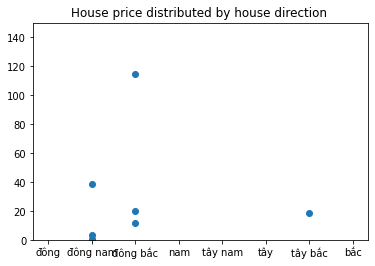

In [93]:
direct = dataframe[dataframe['HouseDirection'] != 'None']
direct['HouseDirection'] = direct['HouseDirection'].apply(lambda x : 'none' if pd.isnull(x) == True else x )
dir = direct.groupby('HouseDirection')['Price'].mean().reset_index(name='Amount of money')
dir = dir.sort_values(by = 'Amount of money', ascending= False).head(8)
topDir = dir['HouseDirection'].unique()
print(topDir)
df8 = direct.loc[direct['HouseDirection'].isin(topDir)]
print(df8['HouseDirection'].unique())
plt.scatter(df8.HouseDirection, df8.Price)
plt.ylim(0,150)
plt.title("House price distributed by house direction ")

C:\Users\Hp\AppData\Local\Temp\ipykernel_21200\3744880606.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(df2['HouseDirection'], rotation=60, horizontalalignment= 'right')


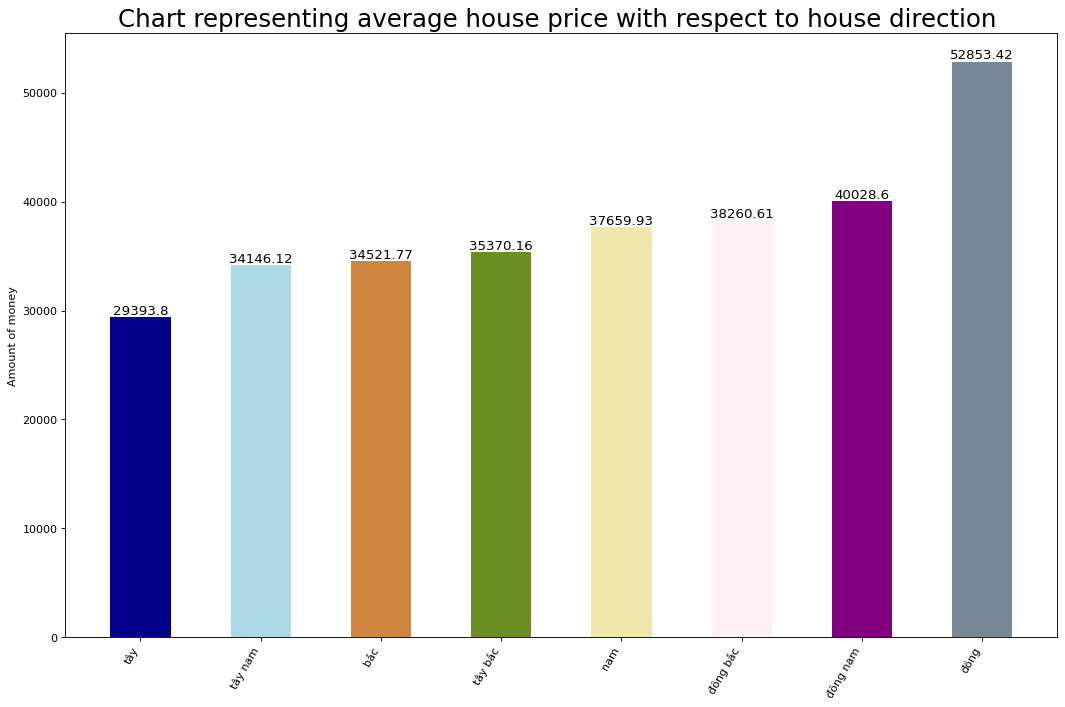

In [94]:
df2 = df8.groupby('HouseDirection')['Price'].mean().reset_index(name='Amount of money')
df2 = df2.sort_values(by = 'Amount of money') 
df2['Amount of money'] = df2['Amount of money'].apply(lambda x : round(x, 2))
n = df2['HouseDirection'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)

plt.figure(figsize=(16,10), dpi= 80)
plt.bar(df2['HouseDirection'], df2['Amount of money'], color=c, width=.5)
for i, val in enumerate(df2['Amount of money'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

plt.gca().set_xticklabels(df2['HouseDirection'], rotation=60, horizontalalignment= 'right')
plt.title("Chart representing average house price with respect to house direction ", fontsize=22)
plt.ylabel('Amount of money')
#plt.ylim(20,40)
plt.show()

['đông bắc' 'bắc' 'đông nam' 'tây' 'tây bắc' 'nam' 'tây nam' 'đông']
['đông bắc' 'tây nam' 'nam' 'tây bắc' 'đông nam' 'bắc' 'đông' 'tây']


C:\Users\Hp\AppData\Local\Temp\ipykernel_21200\1862454689.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  balcony['BalconyDirection'] = balcony['BalconyDirection'].apply(lambda x : 'none' if pd.isnull(x) == True else x )


Text(0.5, 1.0, 'House price distributed by balcony direction ')

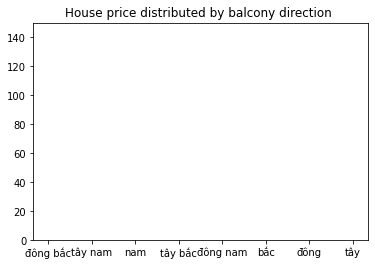

In [95]:
balcony = dataframe[dataframe['BalconyDirection'] != 'None']
balcony['BalconyDirection'] = balcony['BalconyDirection'].apply(lambda x : 'none' if pd.isnull(x) == True else x )
# bal = dftmp[dftmp['balcony'].notnull()]
dir = balcony.groupby('BalconyDirection')['Price'].mean().reset_index(name='Amount of money')
dir = dir.sort_values(by = 'Amount of money', ascending= False).head(8)
topDir = dir['BalconyDirection'].unique()
print(topDir)
df8 = balcony.loc[balcony['BalconyDirection'].isin(topDir)]
print(df8['BalconyDirection'].unique())
plt.scatter(df8.BalconyDirection, df8.Price)
plt.ylim(0,150)
plt.title("House price distributed by balcony direction ")

C:\Users\Hp\AppData\Local\Temp\ipykernel_21200\2282881211.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(df2['BalconyDirection'], rotation=60, horizontalalignment= 'right')


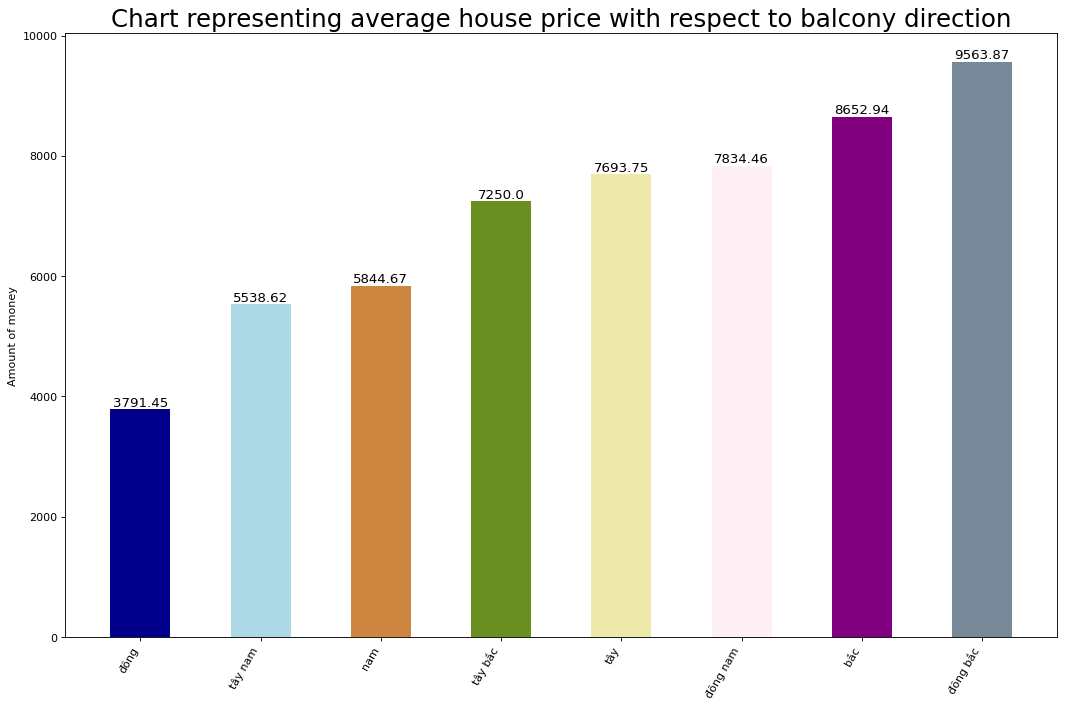

In [96]:
df2 = df8.groupby('BalconyDirection')['Price'].mean().reset_index(name='Amount of money')
df2 = df2.sort_values(by = 'Amount of money') 
df2['Amount of money'] = df2['Amount of money'].apply(lambda x : round(x, 2))
n = df2['BalconyDirection'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)

plt.figure(figsize=(16,10), dpi= 80)
plt.bar(df2['BalconyDirection'], df2['Amount of money'], color=c, width=.5)
for i, val in enumerate(df2['Amount of money'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

plt.gca().set_xticklabels(df2['BalconyDirection'], rotation=60, horizontalalignment= 'right')
plt.title("Chart representing average house price with respect to balcony direction", fontsize=22)
plt.ylabel('Amount of money')
#plt.ylim(20,40)
plt.show()